# Understanding Dataset-2: Delay Discounting Data

In [1]:
import os
import zipfile
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define paths
zip_path = "DD_data.zip"
extract_folder = "DD_data/DD_data"

In [3]:
# List .mat files in the extracted folder
mat_files = [f for f in os.listdir(extract_folder) if f.endswith('.mat')]

# Debugging output
print("MAT files found:", mat_files)

if not mat_files:
    raise FileNotFoundError("No .mat files found in the extracted folder. Check the ZIP file and extraction process.")

# Proceed if files exist
sample_file = mat_files[0]
print(f"Processing file: {sample_file}")


MAT files found: ['Sample1_07mpzgefw.mat', 'Sample1_0ow9y3ng4.mat', 'Sample1_19j097r6c.mat', 'Sample1_1pwx30q0h.mat', 'Sample1_2k3imu1lz.mat', 'Sample1_2rw7x91oz.mat', 'Sample1_2y7h2y7g1.mat', 'Sample1_3sdxo9cfd.mat', 'Sample1_3vkv0cbe1.mat', 'Sample1_416jjdnnn.mat', 'Sample1_59lmk7c90.mat', 'Sample1_7216tqa2d.mat', 'Sample1_7igsa1nbf.mat', 'Sample1_7urrtpotu.mat', 'Sample1_7wtuwovob.mat', 'Sample1_96g8skosc.mat', 'Sample1_9tw8ceqof.mat', 'Sample1_9v9a0mzog.mat', 'Sample1_9vtybo1wv.mat', 'Sample1_a5uzstsdg.mat', 'Sample1_at6mu21pj.mat', 'Sample1_b8x0tj037.mat', 'Sample1_c4nfcv2fz.mat', 'Sample1_cml16ebl7.mat', 'Sample1_d2eqyupv3.mat', 'Sample1_ei0nobwml.mat', 'Sample1_f3eggdrvl.mat', 'Sample1_f3zeh9jib.mat', 'Sample1_fp18o4fwe.mat', 'Sample1_i26dy5na0.mat', 'Sample1_ipex8uk78.mat', 'Sample1_iyx44wgf4.mat', 'Sample1_js4ftmk17.mat', 'Sample1_k0gmonjdn.mat', 'Sample1_ktfmcgrx3.mat', 'Sample1_mr0at8mm8.mat', 'Sample1_qw1758wg8.mat', 'Sample1_t5fyitpcm.mat', 'Sample1_thfibl58o.mat', 'Sample

In [4]:
column_names = [
    "immOutcome_immediate_choice_reward",    # Immediate Reward
    "delOutcome_delayed_choice_reward",    # Delayed Reward
    "delay",   # Delay Time
    "choice",  # Choice (1 = Immediate, 2 = Delayed, 0 = Missing)
    "p_imm",   # Probability Immediate (Experimental Conditions)
    "condition", # Condition (1 = Reward Discounting, 2 = Loss Discounting)
    "RT"       # Reaction Time
]

In [5]:
# Process each .mat file
dataframes = {}
for file in mat_files:
    file_path = os.path.join(extract_folder, file)
    
    # Load MATLAB file
    mat_data = scipy.io.loadmat(file_path)

    # Extract train, test, and labels
    train_data = pd.DataFrame(mat_data["data_train"], columns=column_names)
    test_data = pd.DataFrame(mat_data["data_test"], columns=column_names)
    labels = list(mat_data["data_labels"].flatten())  # Convert label array to list

    # Store in dictionary
    dataframes[file] = {
        "train": train_data,
        "test": test_data,
        "labels": labels
    }

### mat_files: Contains all the .mat files
### mat_data: Contains one matlab file at a time.

In [6]:
# Display the first participant's train and test data
sample_file = mat_files[0]
print("Train Data Sample:")
print(dataframes[sample_file]['train'].head())
print("\nTest Data Sample:")
print(dataframes[sample_file]['test'].head())

Train Data Sample:
   immOutcome_immediate_choice_reward  delOutcome_delayed_choice_reward  \
0                                1.79                               5.0   
1                                9.99                              10.0   
2                                7.33                              10.0   
3                                0.46                              50.0   
4                                0.91                              50.0   

   delay  choice  p_imm  condition      RT  
0  180.0     1.0    0.5        1.0  1721.1  
1   30.0     1.0    0.5        1.0  2190.2  
2  365.0     1.0    0.5        1.0  1590.0  
3  180.0     2.0    0.5        1.0  1804.1  
4   90.0     2.0    0.5        1.0  1722.5  

Test Data Sample:
   immOutcome_immediate_choice_reward  delOutcome_delayed_choice_reward  \
0                                4.91                              20.0   
1                               23.27                              50.0   
2               

# Exploratory Data Anlysis to undertsand the data better

In [7]:
# Display dataset shapes
print(f"Train Shape: {train_data.shape}, Test Shape: {test_data.shape}")
print("Columns:", labels)

Train Shape: (100, 7), Test Shape: (225, 7)
Columns: [array(['immOutcome'], dtype='<U10'), array(['delOutcome'], dtype='<U10'), array(['delay'], dtype='<U5'), array(['action (1=immediate, 2=delayed, 0=missing)'], dtype='<U42'), array(['p_imm'], dtype='<U5'), array(['condition (1=reward,2=loss)'], dtype='<U27'), array(['RT'], dtype='<U2')]


### Check for Missing Values

In [8]:
print("Missing values in Train Data:\n", train_data.isnull().sum())
print("\n Missing values in Test Data:\n", test_data.isnull().sum())

Missing values in Train Data:
 immOutcome_immediate_choice_reward    0
delOutcome_delayed_choice_reward      0
delay                                 0
choice                                0
p_imm                                 0
condition                             0
RT                                    0
dtype: int64

 Missing values in Test Data:
 immOutcome_immediate_choice_reward    0
delOutcome_delayed_choice_reward      0
delay                                 0
choice                                0
p_imm                                 0
condition                             0
RT                                    0
dtype: int64


In [9]:
print("Train Data Statistics:\n", train_data.describe())
print("\nTest Data Statistics:\n", test_data.describe())

Train Data Statistics:
       immOutcome_immediate_choice_reward  delOutcome_delayed_choice_reward  \
count                          100.000000                        100.000000   
mean                            23.186900                         37.000000   
std                             29.998919                         35.333905   
min                              0.020000                          5.000000   
25%                              3.335000                         10.000000   
50%                              9.820000                         20.000000   
75%                             35.940000                         50.000000   
max                             99.990000                        100.000000   

           delay      choice  p_imm  condition           RT  
count  100.00000  100.000000  100.0      100.0   100.000000  
mean   134.40000    1.350000    0.5        1.0  1339.750000  
std    130.54447    0.479372    0.0        0.0   385.084183  
min      7.00000 

## Distribution of Immediate vs Delayed rewards - Histogram plot

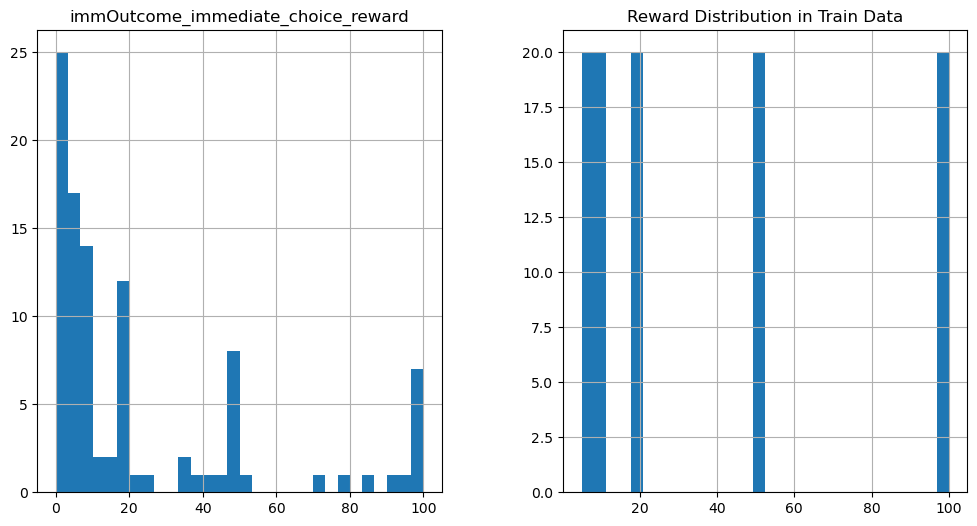

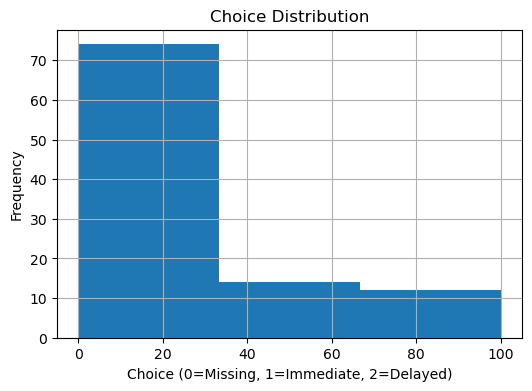

In [10]:
# Select reward columns
reward_cols = ["immOutcome_immediate_choice_reward", "delOutcome_delayed_choice_reward"]

# Select choice column
choice_col = [col for col in train_data.columns if "choice" in col.lower()][0]

# Plot histograms for rewards
train_data[reward_cols].hist(figsize=(12, 6), bins=30)
plt.title("Reward Distribution in Train Data")
plt.show()

# Plot histogram for choice column
plt.figure(figsize=(6, 4))
train_data[choice_col].hist(bins=3)  # Since choice has values 0, 1, or 2
plt.title("Choice Distribution")
plt.xlabel("Choice (0=Missing, 1=Immediate, 2=Delayed)")
plt.ylabel("Frequency")
plt.show()

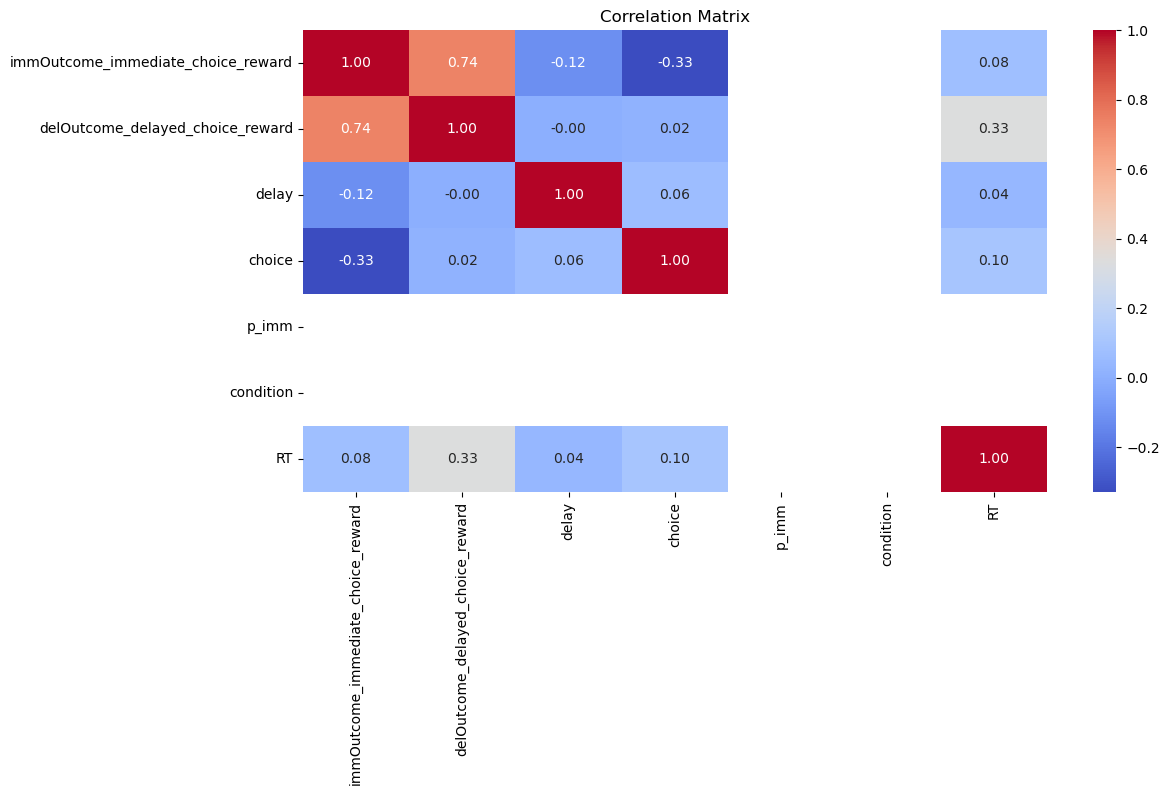

In [11]:
# Plot correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

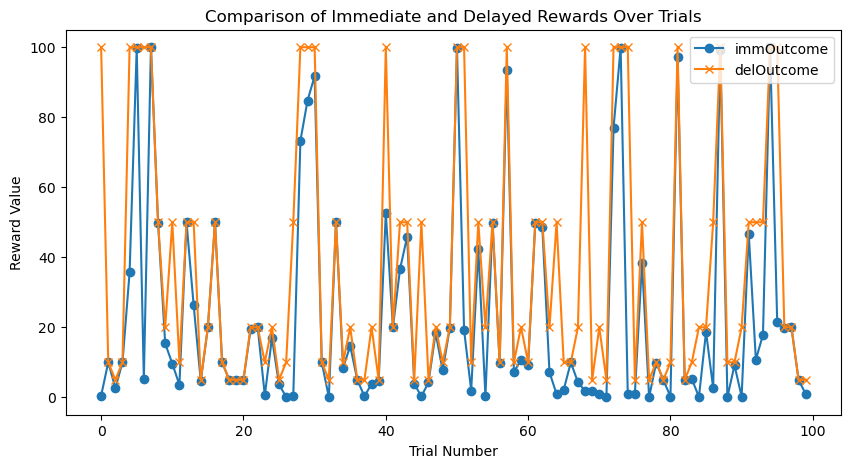

In [12]:
plt.figure(figsize=(10, 5))

# Modify column names based on actual dataset
immediate_rewards = train_data['immOutcome_immediate_choice_reward']
delayed_rewards = train_data['delOutcome_delayed_choice_reward']

plt.plot(immediate_rewards, label="immOutcome", marker="o")
plt.plot(delayed_rewards, label="delOutcome", marker="x")
plt.xlabel("Trial Number")
plt.ylabel("Reward Value")
plt.legend()
plt.title("Comparison of Immediate and Delayed Rewards Over Trials")
plt.show()
